### Figure 6
Reproducing Figure 6, showing the logarithmic scaling of the scrambling time averaged over individual realisations (Appendix A).

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from bisect import bisect_right
import numpy as np
from scipy.optimize import curve_fit

Functions for computing the average scrambling time, and scrambling time of averaged entropy:

In [20]:
def compute_avg_scrambling_time(df, Ssat, cutoff):
    scrambling_times = np.zeros(len(df))
    for i, row in enumerate(df.iterrows()):
        row = list(row[1])
        scrambling_times[i] = bisect_right(row, Ssat - cutoff)
    return scrambling_times.mean()


def compute_scrambling_time_averaged_entropy(df, Ssat, cutoff):
    entropy = df.mean(axis=0)
    return bisect_right(entropy.tolist(), Ssat - cutoff)

### Loading the data
The directory `/data/appendix_data/` contains $19$ `.csv` files labelled by system sizes ranging from $N = 240, 360, ..., 2400$. Each of these files contains all the data from calculating the entropy in $60$ individual realisations of the ThreeQuarterChain circuit. In all cases, the fraction of the chain on which we compute the entanglement entropy is $m = 1/4$. 

In [21]:
avg_scrambling_times = {}
scrambling_times_avg_entropy = {}
cutoffs = [5, 20]

files = [
    file for file in os.listdir("data/appendix_data/") if file.endswith(".csv")
]
for cutoff in cutoffs:
    avg_scrambling_times[cutoff] = []
    scrambling_times_avg_entropy[cutoff] = []
    for file in files:
        n = int(file.split(".")[0][1:])
        Ssat = int(n) / 4
        df = pd.read_csv(f"data/appendix_data/{file}")
        avg_tscr = compute_avg_scrambling_time(df, Ssat, cutoff)
        avg_scrambling_times[cutoff].append((int(n), avg_tscr))
        tscr_avg_ent = compute_scrambling_time_averaged_entropy(
            df, Ssat, cutoff
        )
        scrambling_times_avg_entropy[cutoff].append((int(n), tscr_avg_ent))

for cutoff in cutoffs:
    avg_scrambling_times[cutoff] = sorted(
        avg_scrambling_times[cutoff], key=lambda x: int(x[0])
    )
    scrambling_times_avg_entropy[cutoff] = sorted(
        scrambling_times_avg_entropy[cutoff], key=lambda x: int(x[0])
    )

#### Reproducing the plots
Now fit the logarithmic Ansatz:

In [22]:
def ansatz(x, a, b):
    return b + a * np.log(x)


results_of_fit = {}
for cutoff in cutoffs:
    system_sizes = [N for N, _ in avg_scrambling_times[cutoff]]
    avg_scrambling_times[cutoff] = [
        tscr for _, tscr in avg_scrambling_times[cutoff]
    ]
    scrambling_times_avg_entropy[cutoff] = [
        tscr for _, tscr in scrambling_times_avg_entropy[cutoff]
    ]

    popt1, _ = curve_fit(ansatz, system_sizes, avg_scrambling_times[cutoff])
    popt2, _ = curve_fit(
        ansatz, system_sizes, scrambling_times_avg_entropy[cutoff]
    )
    results_of_fit[cutoff] = (popt1, popt2)

Now plot the left panel:

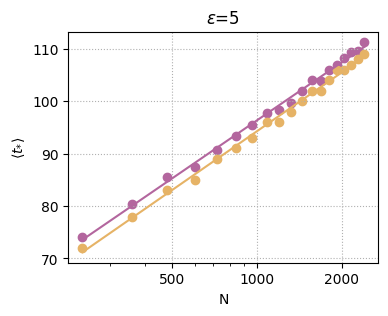

In [23]:
xticks = [500, 1000, 2000]

plt.figure(figsize=(4, 3))
plt.scatter(system_sizes, avg_scrambling_times[cutoffs[0]], color="#b3669e")
plt.scatter(
    system_sizes, scrambling_times_avg_entropy[cutoffs[0]], color="#e6b366"
)
plt.semilogx(
    system_sizes,
    ansatz(
        system_sizes,
        results_of_fit[cutoffs[0]][0][0],
        results_of_fit[cutoffs[0]][0][1],
    ),
    color="#b3669e",
)
plt.semilogx(
    system_sizes,
    ansatz(
        system_sizes,
        results_of_fit[cutoffs[0]][1][0],
        results_of_fit[cutoffs[0]][1][1],
    ),
    color="#e6b366",
)
plt.xticks(xticks)
plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())
plt.xlabel("N")
plt.ylabel(r"$\langle t_{*} \rangle$")
plt.title(f"{r'$\epsilon$'}={cutoffs[0]}")
plt.grid(linestyle="dotted")
plt.show()

Plotting the right panel:

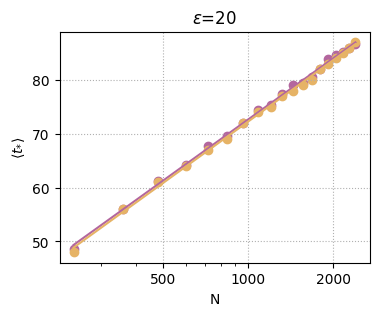

In [24]:
plt.figure(figsize=(4, 3))

plt.scatter(system_sizes, avg_scrambling_times[cutoffs[1]], color="#b3669e")
plt.scatter(
    system_sizes, scrambling_times_avg_entropy[cutoffs[1]], color="#e6b366"
)
plt.semilogx(
    system_sizes,
    ansatz(
        system_sizes,
        results_of_fit[cutoffs[1]][0][0],
        results_of_fit[cutoffs[1]][0][1],
    ),
    color="#b3669e",
)
plt.semilogx(
    system_sizes,
    ansatz(
        system_sizes,
        results_of_fit[cutoffs[1]][1][0],
        results_of_fit[cutoffs[1]][1][1],
    ),
    color="#e6b366",
)
plt.xticks(xticks)
plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())
plt.xlabel("N")
plt.ylabel(r"$\langle t_{*} \rangle$")
plt.title(f"{r'$\epsilon$'}={cutoffs[1]}")
plt.grid(linestyle="dotted")
plt.show()